### Main Takeaways
- Greater dispersion error for more precise models with fewer alts
- Non-linear relationship between sample size and dispersion error
    - least linear for models with fewer alts

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [8]:
df1 = pd.read_csv('../data/disp_err_scale_iters_v2.csv')

df2 = pd.read_csv('../data/disp_err_scale_iters_rand_plus_max.csv')
df3 = pd.read_csv('../data/disp_err_scale_iters_half_max.csv')

df4 = pd.read_csv('../data/disp_err_scale_iters_weighted.csv')

In [23]:
df1.groupby('num_alts').run_id.nunique()

num_alts
200        100
2000        50
20000       10
200000       5
2000000      1
Name: run_id, dtype: int64

In [15]:
dfs = [
    df1,
#     df2, df3,
    df4]

In [10]:
num_metrics = 5
non_metric_cols = ['num_alts', 'num_choosers', 'sample_rate','run_id']
metric_cols = ['total_abs_err', 'pct_abs_err', 'rmse', 'mape', 'sd_pct_err']
metric_labels = [
    "Total Absolute Error",
    "Pct Abs Err",
    "RMSE",
    "MAPE",
    "Std. Dev. Pct. Err.",
]

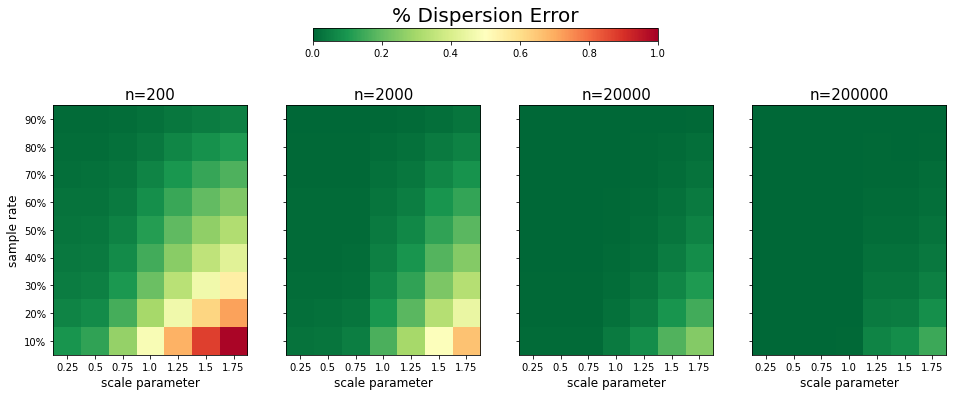

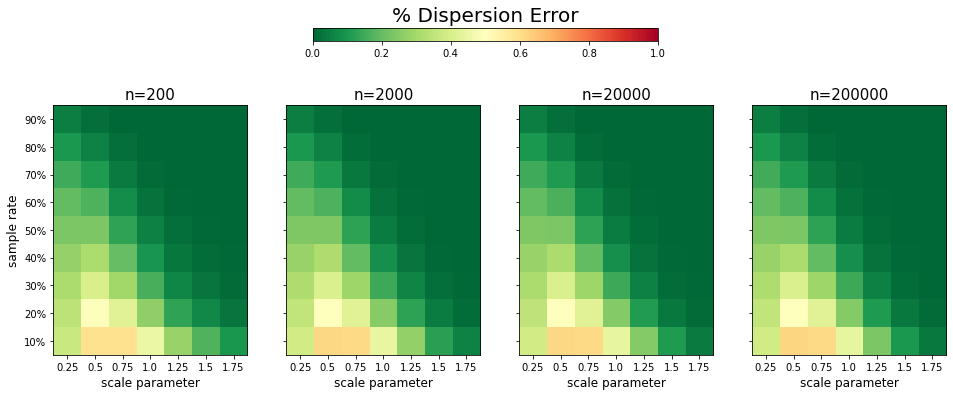

In [16]:
metric = 'pct_abs_err'
for df in dfs:
    df[metric] = df[metric].astype(float).abs()
        
    num_alts_values = df.num_alts.unique().tolist()
    scale_params = df.scale.unique().tolist()
#     num_num_alts_values = len(num_alts_values)
    num_num_alts_values = 4
    fig, axarr = plt.subplots(1, num_num_alts_values, figsize=(16,6), sharey=True)
    vmax = 1
    vmin = 0
    for i, ax in enumerate(axarr):
        if i > len(num_alts_values) - 1:
            continue
        tmp_df = df[(df['num_alts'] == num_alts_values[i]) & (df['sample_rate'] < 1)]
        tmp_df['sample_rate'] = (tmp_df['sample_rate'] * 100).astype('int').astype(str) + '%'
        piv_df = tmp_df.pivot_table(index='sample_rate', columns='scale', values=metric)
        piv_df = piv_df.sort_index(level=0, ascending=False)
        im = ax.imshow(piv_df, cmap='RdYlGn_r', vmin=vmin, vmax=vmax)
        ax.set_ylabel("")
        ax.set_xlabel("scale parameter", fontsize=12)
        xticks_loc = ax.get_xticks().tolist()
        ax.set_xticks(list(np.arange(len(scale_params))))
        ax.set_xticklabels(list(scale_params))
        ax.set_title("n={0}".format(num_alts_values[i]), fontsize=15)

    _ = axarr[0].set_ylabel("sample rate", fontsize=12)
    _ = axarr[0].set_yticks(list(np.arange(len(list(piv_df.index.values)))))
    _ = axarr[0].set_yticklabels(list(piv_df.index.values), rotation='horizontal')
    fig.subplots_adjust(top=0.8)
    cbar_ax = fig.add_axes([0.35, 0.9, 0.3, 0.03])
    fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    fig.suptitle("% Dispersion Error", fontsize=20)


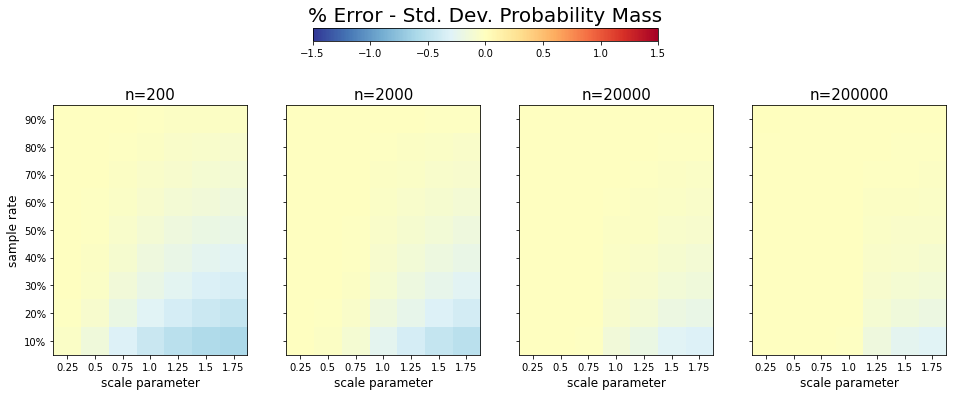

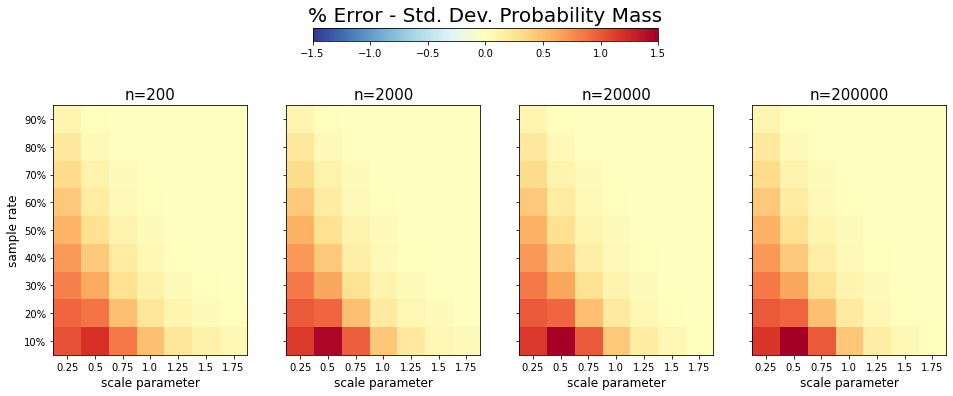

In [22]:
metric = 'sd_pct_err'
for df in dfs:
    df[metric] = df[metric].astype(float)
        
    num_alts_values = df.num_alts.unique().tolist()
    scale_params = df.scale.unique().tolist()
#     num_num_alts_values = len(num_alts_values)
    num_num_alts_values = 4
    fig, axarr = plt.subplots(1, num_num_alts_values, figsize=(16,6), sharey=True)
    vmax = 1.5  #df[df['sample_rate'] < 1].groupby(['sample_rate', 'scale', 'num_alts'])[metric].mean().abs().max()
    vmin = -vmax
    for i, ax in enumerate(axarr):
        if i > len(num_alts_values) - 1:
            continue
        tmp_df = df[(df['num_alts'] == num_alts_values[i]) & (df['sample_rate'] < 1)]
        tmp_df['sample_rate'] = (tmp_df['sample_rate'] * 100).astype('int').astype(str) + '%'
        piv_df = tmp_df.pivot_table(index='sample_rate', columns='scale', values=metric)
        piv_df = piv_df.sort_index(level=0, ascending=False)
        im = ax.imshow(piv_df, cmap='RdYlBu_r', vmin=vmin, vmax=vmax)
        ax.set_ylabel("")
        ax.set_xlabel("scale parameter", fontsize=12)
        xticks_loc = ax.get_xticks().tolist()
        ax.set_xticks(list(np.arange(len(scale_params))))
        ax.set_xticklabels(list(scale_params))
        ax.set_title("n={0}".format(num_alts_values[i]), fontsize=15)

    _ = axarr[0].set_ylabel("sample rate", fontsize=12)
    _ = axarr[0].set_yticks(list(np.arange(len(list(piv_df.index.values)))))
    _ = axarr[0].set_yticklabels(list(piv_df.index.values), rotation='horizontal')
    fig.subplots_adjust(top=0.8)
    cbar_ax = fig.add_axes([0.35, 0.9, 0.3, 0.03])
    fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    fig.suptitle("% Error - Std. Dev. Probability Mass", fontsize=20)
